# Análisis eventos mes Diciembre

In [ ]:
!pip install squarify
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import numpy as np 
import pandas as pd 
import os
from statsmodels import api as sm
import pylab as py
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import seaborn as sns
import squarify


In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
colnames= ['Fecha', 'evento_tipo', 'id_producto', 'id_categoria', 'codigo_categoria', 'marca', 'precio', 'id_sesion', 'usuario_sesion']
df = pd.read_csv('/content/drive/MyDrive/saleforcasting/datos/datos_e.csv/part-00000-92c5c509-b354-42d2-829d-3b94539c5328-c000.csv', names = colnames, header = None)

In [ ]:
df=reduce_mem_usage(df)

Memory usage after optimization is: 2960.24 MB
Decreased by 19.4%


In [ ]:
df.head()

,Fecha,evento_tipo,id_producto,id_categoria,codigo_categoria,marca,precio,id_sesion,usuario_sesion
0,2019-12-24 18:26:12 UTC,view,100001784,2232732110643266300,country_yard.furniture.hammok,amen,37.78125,590514767,0000013c-0ccc-4b8a-a4f7-06ec6b4ce13a
1,2019-12-29 13:03:35 UTC,view,54100045,2232732127806357670,apparel.costume,dewalt,731.50000,520002923,00000f20-be94-4852-ae2e-217eb8be6212
2,2019-12-13 15:18:03 UTC,view,4804137,2232732079706079299,sport.bicycle,huawei,113.00000,531311000,0000220e-867e-4a5f-b01d-a03b23a54b80
3,2019-12-14 09:32:42 UTC,view,100018608,2053013554658804075,electronics.audio.headphone,asus,360.25000,573100110,0000378c-1b54-4c35-a8fa-1ad3fcb1dada
4,2019-12-16 18:10:40 UTC,cart,1801806,2232732099754852875,appliances.personal.massager,artel,123.12500,521312903,000075ec-17f9-4bb1-92fa-3e57d7dbf71e


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53517960 entries, 0 to 53517959
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Fecha             object 
 1   evento_tipo       object 
 2   id_producto       int32  
 3   id_categoria      int64  
 4   codigo_categoria  object 
 5   marca             object 
 6   precio            float16
 7   id_sesion         int32  
 8   usuario_sesion    object 
dtypes: float16(1), int32(2), int64(1), object(5)
memory usage: 2.9+ GB


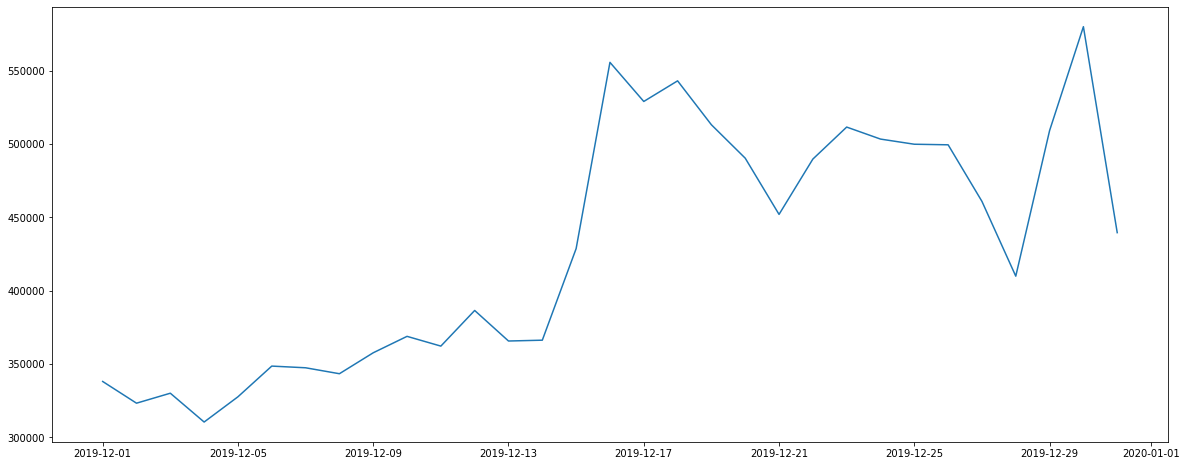

In [ ]:
#No de visitantes por dia
data = df.loc[:,['Fecha','usuario_sesion']]
data['Fecha'] = data['Fecha'].apply(lambda s: str(s)[0:10])
visitor_by_date = data.drop_duplicates().groupby(['Fecha'])['usuario_sesion'].agg(['count']).sort_values(by=['Fecha'], ascending=True)
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

In [ ]:
#Marca más valorable
#Marcas más buscadas
df['marca'].value_counts(10)

samsung       1.588427e-01
apple         1.042837e-01
xiaomi        9.661261e-02
huawei        3.548386e-02
lucente       2.294439e-02
                  ...     
mustang       1.868756e-08
homelife      1.868756e-08
kaisavilla    1.868756e-08
bratz         1.868756e-08
aletant       1.868756e-08
Name: marca, Length: 4236, dtype: float64

          Fecha  evento_tipo  id_producto  id_categoria  codigo_categoria  \
marca                                                                       
a-case      197          197          197           197               197   
a-derma       3            3            3             3                 3   
a-elita       6            6            6             6                 6   
a-mega        2            2            2             2                 2   
aardwolf      8            8            8             8                 8   
...         ...          ...          ...           ...               ...   
zte          63           63           63            63                63   
zubr        182          182          182           182               182   
zuru          3            3            3             3                 3   
zvezda        3            3            3             3                 3   
zyxel         1            1            1             1                 1   

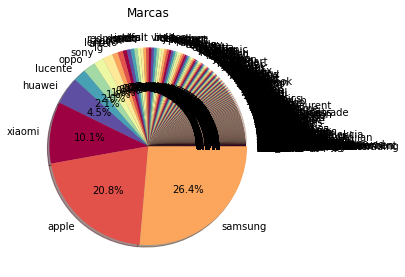

In [ ]:
#Marcas más vendidas
title_type = df[df.evento_tipo =='purchase'].groupby('marca').agg('count')
print(title_type)
type_labels = title_type.usuario_sesion.sort_values().index
type_counts = title_type.usuario_sesion.sort_values()
plt.figure(1,figsize =(20,10))
the_grid = GridSpec(2,2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0,1,8)]
plt.subplot(the_grid[0,1],aspect=1,title = 'Marcas')
type_show_ids = plt.pie(type_counts,labels = type_labels,autopct = '%1.1f%%',shadow = True,colors = colors)
plt.show()

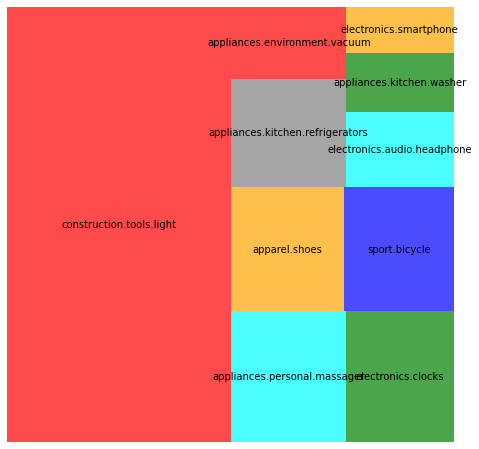

In [ ]:
#Categorias más vistas
top_category_n = 10
top_category = df.loc[:,'codigo_categoria'].value_counts()[:top_category_n].sort_values(ascending=False)
squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

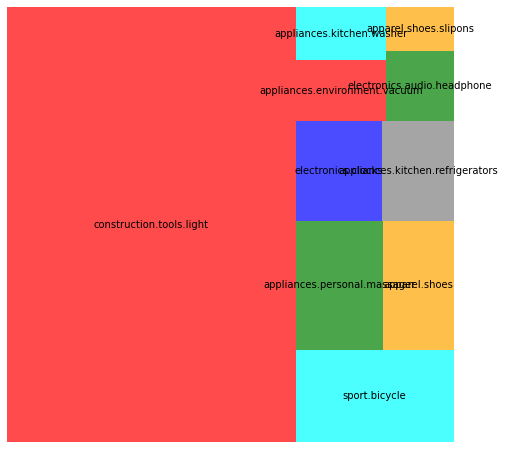

In [ ]:
top_category_n = 10
top_category = df[df.evento_tipo =='purchase'].loc[:,'codigo_categoria'].value_counts()[:top_category_n].sort_values(ascending=False)
squarify.plot(sizes=top_category, label=top_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

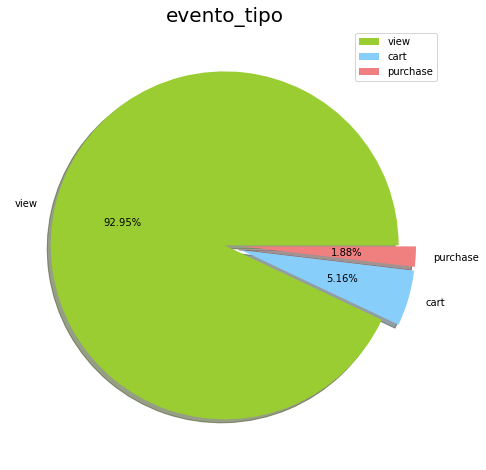

In [ ]:
labels = ['view', 'cart','purchase']
size = df['evento_tipo'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('evento_tipo', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
#Indice de conversión
view_count = df['evento_tipo'].value_counts()[0]
cart_count = df['evento_tipo'].value_counts()[1]
purchase_count = df['evento_tipo'].value_counts()[2]
print("Ratio de conversión entre visto y comprado" +str((purchase_count/view_count)*100) +'%')
print("Ratio de conversión entre visto y añadido al carro" +str((cart_count/view_count)*100) +'%')
print("Ratio de conversión entre añadido al carro y comprado" +str((purchase_count/cart_count)*100) +'%')

Ratio de conversión entre visto y comprado2.025196612716369%
Ratio de conversión entre visto y añadido al carro5.556100317191985%
Ratio de conversión entre añadido al carro y comprado36.4499648512446%


samsung     265767
apple       209510
xiaomi      101498
huawei       45116
lucente      21009
             ...  
muravej          1
mojmalys         1
rode             1
chenri           1
colab            1
Name: marca, Length: 2643, dtype: int64


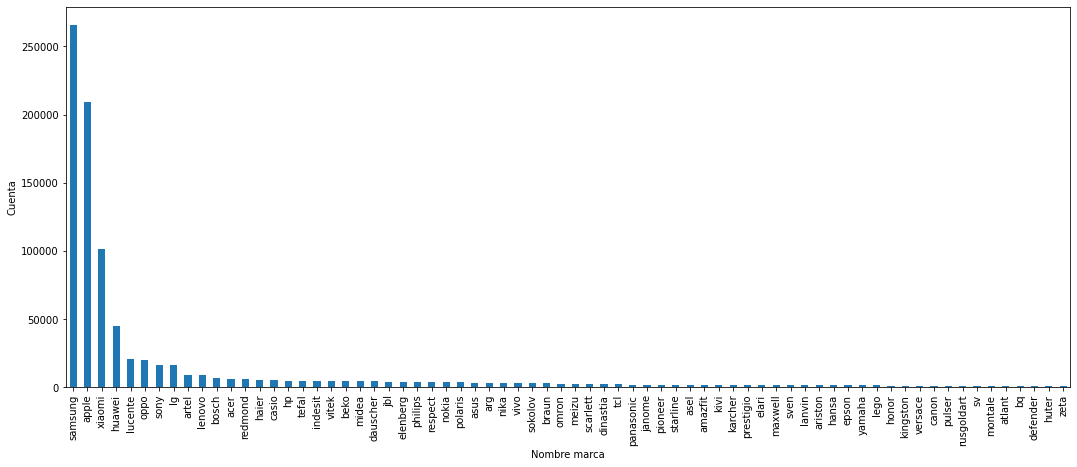

In [ ]:
#Ventas por marca
d = df.loc[df['evento_tipo'].isin(['purchase'])].drop_duplicates()
print(d['marca'].value_counts())
d['marca'].value_counts().head(70).plot.bar(figsize =(18,7))
plt.xlabel('Nombre marca')
plt.ylabel('Cuenta')
plt.show()

# Análisis compra Smartphone

In [ ]:
#Día de la semana que más se compra smartphone

In [ ]:
df_p = pd.read_csv('/content/drive/MyDrive/saleforcasting/datos/datos.csv')

In [ ]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734123 entries, 0 to 734122
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     734123 non-null  int64  
 1   Unnamed: 0.1   734123 non-null  int64  
 2   event_time     734123 non-null  object 
 3   event_type     734123 non-null  object 
 4   product_id     734123 non-null  int64  
 5   category_id    734123 non-null  int64  
 6   category_code  734123 non-null  object 
 7   brand          733300 non-null  object 
 8   price          734123 non-null  float64
 9   user_id        734123 non-null  int64  
 10  user_session   734123 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 61.6+ MB


In [ ]:
df_p.dtypes

Unnamed: 0                int64
Unnamed: 0.1              int64
event_time       datetime64[ns]
event_type               object
product_id                int64
category_id               int64
category_code            object
brand                    object
price                   float64
user_id                   int64
user_session             object
dtype: object

In [ ]:
df_p.head(10)

,Unnamed: 0,Unnamed: 0.1,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,162,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,1,308,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
2,2,618,2019-10-01 00:10:08 UTC,purchase,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238
3,3,860,2019-10-01 00:14:14 UTC,purchase,1004932,2053013555631882655,electronics.smartphone,vivo,463.31,555083442,83d12d1a-5452-4fa0-abbb-d9f492f8b562
4,4,1558,2019-10-01 02:19:10 UTC,purchase,1004246,2053013555631882655,electronics.smartphone,apple,736.18,515246296,b7dbae4f-cad3-463e-89ce-41990cf48dea
5,5,1649,2019-10-01 02:19:34 UTC,purchase,1005104,2053013555631882655,electronics.smartphone,apple,975.57,555160488,a1395546-c124-456c-9752-0f5cf883c63d
6,6,1905,2019-10-01 02:20:33 UTC,purchase,1003316,2053013555631882655,electronics.smartphone,apple,946.97,516198933,e1050ba4-5425-4b8e-9cc8-194878031718
7,7,2073,2019-10-01 02:21:02 UTC,purchase,1004659,2053013555631882655,electronics.smartphone,samsung,787.18,555168263,d068d08f-aaf3-4949-b031-cdaf49a5c7cf
8,8,2478,2019-10-01 02:22:11 UTC,purchase,1004750,2053013555631882655,electronics.smartphone,samsung,197.43,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291
9,9,2795,2019-10-01 02:23:05 UTC,purchase,1004903,2053013555631882655,electronics.smartphone,huawei,111.82,512812487,d3ef047f-9476-4b8d-a126-b483c55de653


In [ ]:
data2 = df_p.loc[:,['event_time','user_session','user_id','event_type','price']]
data2['event_time'] = data2['event_time'].apply(lambda s: str(s)[0:10])

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734123 entries, 0 to 734122
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   event_time    734123 non-null  object 
 1   user_session  734123 non-null  object 
 2   user_id       734123 non-null  int64  
 3   event_type    734123 non-null  object 
 4   price         734123 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 28.0+ MB


In [ ]:
daily_summary_table = data2.groupby(by=[data2['c']]).agg(Number_of_daily_visits=('user_session',lambda x: x.nunique()),
                                                                                  Number_of_daily_visitors=('user_id',lambda x: x.nunique())
                                                                                  )
sales_filter = data2['event_type']=='purchase'
sales = data2.loc[sales_filter].groupby(by=[data2['event_time']]).agg(number_of_daily_sales=('event_type','count'),
                                                                                      Total_daily_sales=('price','sum')
                                                                                      ).reset_index()
daily_summary_table = pd.merge(left=daily_summary_table,
                               right=sales,
                               left_on=['event_time'],
                               right_on=['event_time'],
                               how='left')
daily_summary_table['conversion_rate']=daily_summary_table['number_of_daily_sales']/daily_summary_table['Number_of_daily_visits']

In [ ]:
daily_summary_table['event_time']=pd.to_datetime(daily_summary_table['event_time'])

In [ ]:
print('Estadísticas de visitas diarias')
print('-'*50)
print(daily_summary_table['Number_of_daily_visits'].describe())
print('-'*50)
print('Estadísticas de visitas por fecha')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visits'].describe())


Estadísticas de visitas diarias
--------------------------------------------------
count      209.000000
mean      2973.765550
std       5561.195277
min          2.000000
25%         10.000000
50%         96.000000
75%       8221.000000
max      52909.000000
Name: Number_of_daily_visits, dtype: float64
--------------------------------------------------
Estadísticas de visitas por fecha
--------------------------------------------------
            count         mean           std  min    25%    50%      75%  \
event_time                                                                 
Friday       29.0  2782.827586   4480.686778  3.0  10.00  116.0  8819.00   
Monday       29.0  2691.482759   4329.343720  5.0   9.00   95.0  8037.00   
Saturday     30.0  3211.933333   5409.638199  2.0  13.00  104.0  8505.50   
Sunday       30.0  3929.733333  10010.931649  2.0   8.25  107.0  6467.50   
Thursday     30.0  2742.466667   4172.139770  6.0  13.25  110.0  7953.75   
Tuesday      30.0  2732.2666

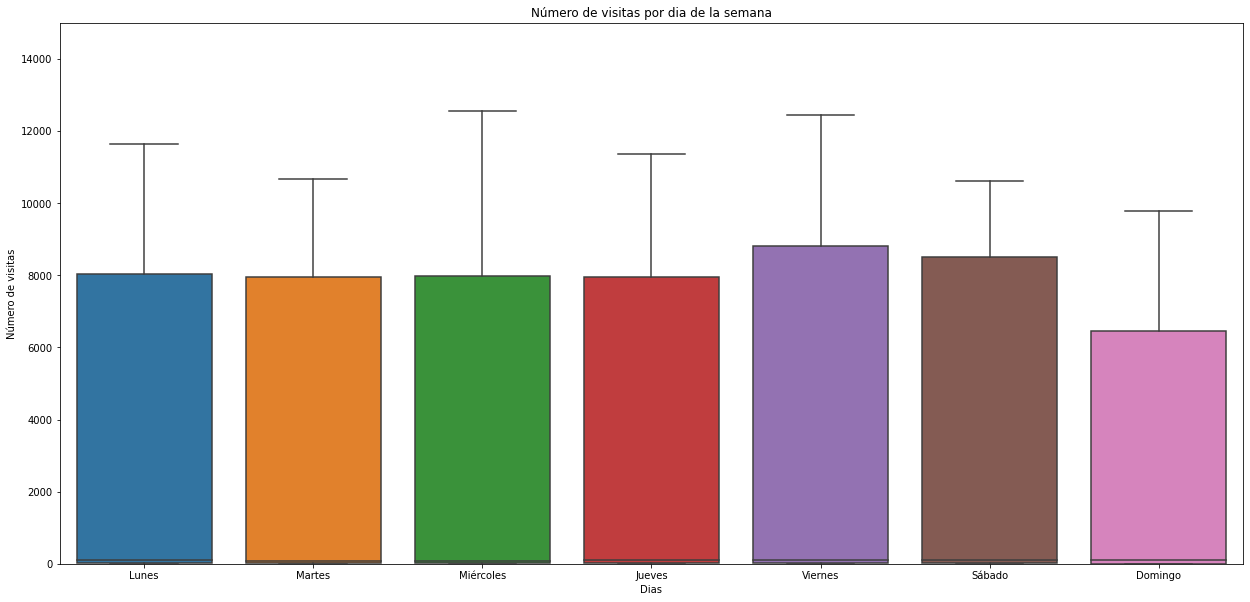

In [ ]:
fig=plt.figure(figsize=(18,9))
sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='Number_of_daily_visits',
            data=daily_summary_table,
            )
plt.ylim(0, 15000)
plt.title('Número de visitas por dia de la semana')
plt.ylabel('Número de visitas')
plt.xlabel('Dias')
plt.xticks([0, 1, 2,3,4,5,6], ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
fig.tight_layout(pad=3.0);

# RFM Análisis

In [ ]:
data3=data2.groupby(by='user_session').agg(Date_order=('event_time',lambda x: x.max()),
                                                  user_id=('user_id',lambda x: x.unique()),
                                          Quantity=('user_session','count'),
                                         money_spent=('price','sum')).reset_index(drop=True)

In [ ]:
data3['Date_order'].max()

'2020-04-30'

In [ ]:
data3['Date_order']=pd.to_datetime(data3['Date_order'])

In [ ]:
import datetime as dt
study_date = dt.datetime(2020,5,1)
data3=pd.DataFrame(data3)
data3['last_purchase']=study_date - data3['Date_order']
data3['last_purchase'].astype('timedelta64[D]')
data3['last_purchase']=data3['last_purchase'] / np.timedelta64(1, 'D')
data3.head()

,Date_order,user_id,Quantity,money_spent,last_purchase
0,2019-10-06,546521725,1,289.52,208.0
1,2019-10-25,560486342,1,171.90,189.0
2,2019-12-04,574378477,1,360.11,149.0
3,2019-10-17,560744406,2,379.78,197.0
4,2019-10-23,534210306,2,571.92,191.0


In [ ]:
RFM= data3.groupby('user_id').agg(Recency=('last_purchase',lambda x: x.min()),
                                 Frequency=('user_id',lambda x: x.count()),
                                 Monetary=('money_spent',lambda x: x.sum()))
RFM.head()

,Recency,Frequency,Monetary
user_id,,,
299358698,174.0,1,154.19
304707635,170.0,1,2007.52
307138432,175.0,1,106.57
315835876,159.0,1,169.89
366237542,164.0,1,126.90


In [ ]:
RFM.quantile(q=[0.25,0.5,0.75])

,Recency,Frequency,Monetary
0.25,165.0,1.0,202.320
0.50,174.0,1.0,408.805
0.75,193.0,2.0,999.000


In [ ]:
quartiles=RFM.quantile(q=[0.25,0.5,0.75]).to_dict()
quartiles

{'Recency': {0.25: 165.0, 0.5: 174.0, 0.75: 193.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 202.32, 0.5: 408.805, 0.75: 999.0}}

In [ ]:
## segmentación por Recency 

def R(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary 

def FM(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1 

In [ ]:
#creación RFM segmentacion columna
RFM['R_Quartile'] = RFM['Recency'].apply(R, args=('Recency',quartiles,))
RFM['F_Quartile'] = RFM['Frequency'].apply(FM, args=('Frequency',quartiles,))
RFM['M_Quartile'] = RFM['Monetary'].apply(FM, args=('Monetary',quartiles,))
RFM['RFM_segmentation'] = RFM.R_Quartile.map(str) \
                    + RFM.F_Quartile.map(str) \
                    + RFM.M_Quartile.map(str)
RFM['RFM_score'] = RFM.R_Quartile.map(int) \
                    + RFM.F_Quartile.map(int) \
                    + RFM.M_Quartile.map(int)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id,,,,,,,,
299358698,174.0,1,154.19,2,4,4,244,10
304707635,170.0,1,2007.52,2,4,1,241,7
307138432,175.0,1,106.57,3,4,4,344,11
315835876,159.0,1,169.89,1,4,4,144,9
366237542,164.0,1,126.90,1,4,4,144,9


In [ ]:
# Defino rfm_nivel
def RFM_label(data):
    if data['RFM_score'] >= 10:
        return 'Lost'
    elif ((data['RFM_score'] >= 9) and (data['RFM_score'] < 10)):
        return 'Hibernating'
    elif ((data['RFM_score'] >= 8) and (data['RFM_score'] < 9)):
        return 'Can’t Lose Them'
    elif ((data['RFM_score'] >= 7) and (data['RFM_score'] < 8)):
        return 'About To Sleep'
    elif ((data['RFM_score'] >= 6) and (data['RFM_score'] < 7)):
        return 'Promising'
    elif ((data['RFM_score'] >= 5) and (data['RFM_score'] < 6)):
        return 'Potential Loyalist'
    elif ((data['RFM_score'] >= 4) and (data['RFM_score'] < 5)):
        return 'Loyal Customers'
    else:
        return 'Champions'

RFM['RFM_label'] = RFM.apply(RFM_label, axis=1)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_label
user_id,,,,,,,,,
299358698,174.0,1,154.19,2,4,4,244,10,Lost
304707635,170.0,1,2007.52,2,4,1,241,7,About To Sleep
307138432,175.0,1,106.57,3,4,4,344,11,Lost
315835876,159.0,1,169.89,1,4,4,144,9,Hibernating
366237542,164.0,1,126.90,1,4,4,144,9,Hibernating


In [ ]:
# Calcular cuantos hay en cada nivel
RFM_desc = RFM.groupby('RFM_label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

print(RFM_desc)

                   Recency Frequency Monetary        
                      mean      mean     mean   count
RFM_label                                            
About To Sleep       171.4       1.5    959.1   33640
Can’t Lose Them      170.0       1.2    643.0   42586
Champions            154.6       7.6   5140.4   16223
Hibernating          173.8       1.1    482.0   59016
Lost                 191.2       1.0    247.8  111517
Loyal Customers      161.5       4.1   2748.0   17880
Potential Loyalist   169.9       3.6   2323.1   22093
Promising            174.5       2.5   1511.9   26407


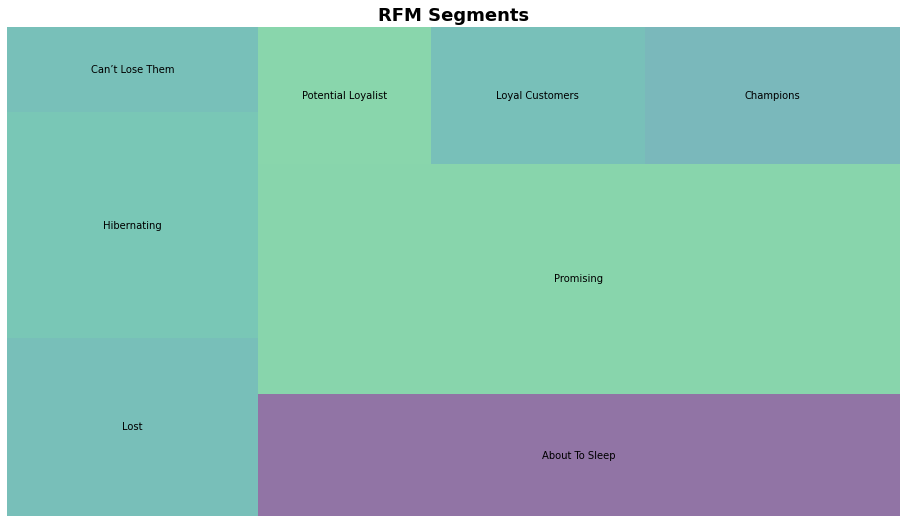

In [ ]:
RFM_desc.columns = RFM_desc.columns.droplevel()
RFM_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()